# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import zscore

In [19]:
# Carregar a base de dados
df = pd.read_csv('M14_dataframe.csv')

# Visualizar as primeiras linhas do dataframe
df.head()

,CustomerID,Gender,IsElderly,IsMarried,HasDependents,Tenure,PhoneService,InternetService,SecurityService,TechnicalSupport,StreamingTV,ContractType,PaymentMethod,MonthlyPayment,TotalPaid,Churn
0,7590-VHVEG,female,False,True,False,1,False,dsl,False,False,False,month-to-month,electronic check,29.85,29.85,False
1,5575-GNVDE,male,False,False,False,34,True,dsl,True,False,False,one year,mailed check,56.95,1889.50,False
2,3668-QPYBK,male,False,False,False,2,True,dsl,True,False,False,month-to-month,mailed check,53.85,108.15,True
3,7795-CFOCW,male,False,False,False,45,False,dsl,True,True,False,one year,bank transfer (automatic),71.45,1840.75,False
4,9237-HQITU,male,False,False,False,2,True,fiber optic,False,False,False,month-to-month,electronic check,71.45,151.65,True


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [20]:
# Análise descritiva
df_describe = df.describe(include=[np.number])
df_describe

,Tenure,MonthlyPayment,TotalPaid
count,2495.000000,2495.000000,2495.000000
mean,32.354309,66.356894,2292.625812
std,24.634007,28.013627,2266.888527
min,0.000000,18.400000,18.800000
25%,8.000000,45.550000,402.175000
50%,29.000000,71.450000,1404.650000
75%,56.000000,87.375000,3874.750000
max,72.000000,118.650000,8564.750000


### 2A. Análise Descritiva

O método `.describe()` retorna as estatísticas descritivas para as variáveis numéricas (`Tenure`, `MonthlyPayment`, `TotalPaid`):

#### Tenure (tempo de permanência):
- **Média**: aproximadamente 32 meses, indicando que os clientes permanecem, em média, por cerca de 2 anos e meio.
- **Mediana**: 29 meses, mostrando que a metade dos clientes permanece menos de 29 meses, enquanto a outra metade fica mais.
- **Valores mínimos e máximos**: entre 0 e 72 meses, o que sugere que o tempo de permanência pode variar de novos clientes a aqueles com 6 anos.

#### MonthlyPayment (pagamento mensal):
- **Média**: cerca de 66,36, indicando que o valor mensal que os clientes pagam é relativamente alto.
- **Mediana**: 71,45, o que é levemente acima da média e sugere uma leve assimetria.
- **Intervalo**: de 18,4 a 118,65, com clientes pagando desde planos mais básicos até pacotes completos com mais serviços.

#### TotalPaid (total pago):
- **Média**: 2292,63, mostrando o valor médio total pago pelos clientes ao longo do contrato.
- **Mediana**: 1404,65, o que indica que muitos clientes permanecem um tempo razoável, acumulando um valor significativo.
- **Intervalo**: de 18,8 a 8564,75, evidenciando que alguns clientes estão há muito tempo e outros são relativamente novos.

Esse resumo nos dá uma visão inicial sobre a distribuição dessas variáveis e sugere que há uma ampla diversidade nos tempos de permanência e pagamentos.


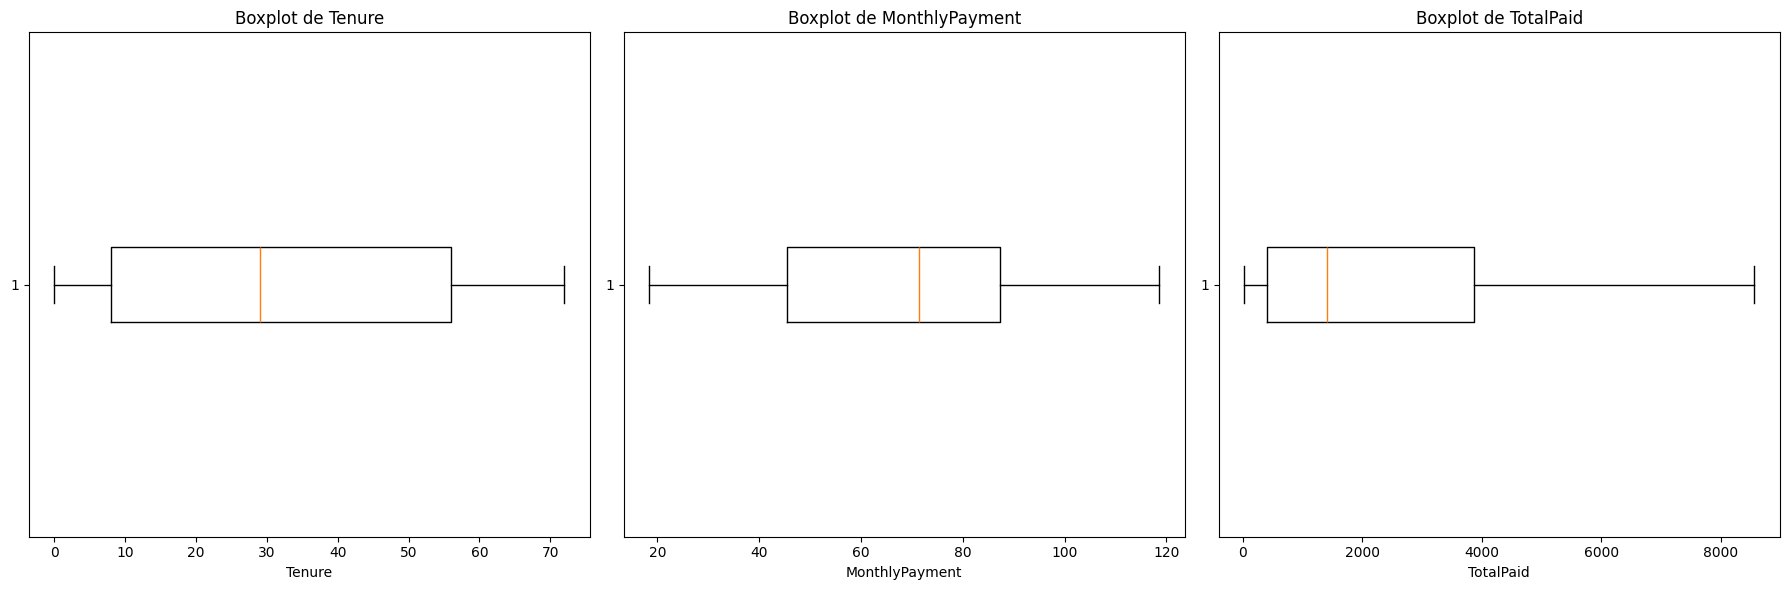

Outliers em Tenure (IQR):
Empty DataFrame
Columns: [CustomerID, Tenure]
Index: []

Outliers em MonthlyPayment (IQR):
Empty DataFrame
Columns: [CustomerID, MonthlyPayment]
Index: []

Outliers em TotalPaid (IQR):
Empty DataFrame
Columns: [CustomerID, TotalPaid]
Index: []

Outliers em Tenure (Z-score):
Empty DataFrame
Columns: [CustomerID, Tenure, Tenure_zscore]
Index: []

Outliers em MonthlyPayment (Z-score):
Empty DataFrame
Columns: [CustomerID, MonthlyPayment, MonthlyPayment_zscore]
Index: []

Outliers em TotalPaid (Z-score):
Empty DataFrame
Columns: [CustomerID, TotalPaid, TotalPaid_zscore]
Index: []

Observação:
Nenhum outlier foi identificado nas variáveis 'Tenure', 'MonthlyPayment' ou 'TotalPaid' tanto pelo método IQR quanto pelo Z-score, indicando que os dados estão dentro dos limites esperados para ambas as técnicas.


In [21]:
# Boxplot para visualização inicial dos possíveis outliers
plt.figure(figsize=(18, 6))

# Boxplot para Tenure
plt.subplot(1, 3, 1)
plt.boxplot(df['Tenure'], vert=False)
plt.title('Boxplot de Tenure')
plt.xlabel('Tenure')

# Boxplot para MonthlyPayment
plt.subplot(1, 3, 2)
plt.boxplot(df['MonthlyPayment'], vert=False)
plt.title('Boxplot de MonthlyPayment')
plt.xlabel('MonthlyPayment')

# Boxplot para TotalPaid
plt.subplot(1, 3, 3)
plt.boxplot(df['TotalPaid'], vert=False)
plt.title('Boxplot de TotalPaid')
plt.xlabel('TotalPaid')

plt.tight_layout()
plt.show()

# Função para identificar outliers usando o IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identificando outliers com base no IQR
outliers_tenure_iqr = identify_outliers_iqr(df, 'Tenure')
outliers_monthly_payment_iqr = identify_outliers_iqr(df, 'MonthlyPayment')
outliers_total_paid_iqr = identify_outliers_iqr(df, 'TotalPaid')

# Exibindo os outliers identificados com base no IQR
print("Outliers em Tenure (IQR):")
print(outliers_tenure_iqr[['CustomerID', 'Tenure']])

print("\nOutliers em MonthlyPayment (IQR):")
print(outliers_monthly_payment_iqr[['CustomerID', 'MonthlyPayment']])

print("\nOutliers em TotalPaid (IQR):")
print(outliers_total_paid_iqr[['CustomerID', 'TotalPaid']])

# Aplicando Z-score para identificar outliers
df['Tenure_zscore'] = zscore(df['Tenure'])
df['MonthlyPayment_zscore'] = zscore(df['MonthlyPayment'])
df['TotalPaid_zscore'] = zscore(df['TotalPaid'])

# Filtrando outliers com base no Z-score
outliers_tenure_zscore = df[abs(df['Tenure_zscore']) > 3]
outliers_monthly_payment_zscore = df[abs(df['MonthlyPayment_zscore']) > 3]
outliers_total_paid_zscore = df[abs(df['TotalPaid_zscore']) > 3]

# Exibindo os outliers encontrados com base no Z-score
print("\nOutliers em Tenure (Z-score):")
print(outliers_tenure_zscore[['CustomerID', 'Tenure', 'Tenure_zscore']])

print("\nOutliers em MonthlyPayment (Z-score):")
print(outliers_monthly_payment_zscore[['CustomerID', 'MonthlyPayment', 'MonthlyPayment_zscore']])

print("\nOutliers em TotalPaid (Z-score):")
print(outliers_total_paid_zscore[['CustomerID', 'TotalPaid', 'TotalPaid_zscore']])

# Explicação dos resultados
print("\nObservação:")
print("Nenhum outlier foi identificado nas variáveis 'Tenure', 'MonthlyPayment' ou 'TotalPaid' tanto pelo método IQR quanto pelo Z-score, indicando que os dados estão dentro dos limites esperados para ambas as técnicas.")


### 2B. Identificação de Outliers

**Resposta**:  
Com esses resultados em mãos, eu posso dizer que as variáveis `Tenure`, `MonthlyPayment` e `TotalPaid` estão dentro do esperado para a amostra. Tanto pelo método do IQR quanto pelo Z-score, não apareceu nada que seja considerado fora do padrão, o que é ótimo.

Usando o método IQR, nenhum valor extrapolou os limites definidos, ou seja, os dados não mostraram pontos extremos que chamassem a atenção. E com o Z-score, que olha para desvios em relação à média, também não apareceu nada "gritante". Isso reforça que os dados estão bem distribuídos e que esses valores não estão distorcendo a análise.


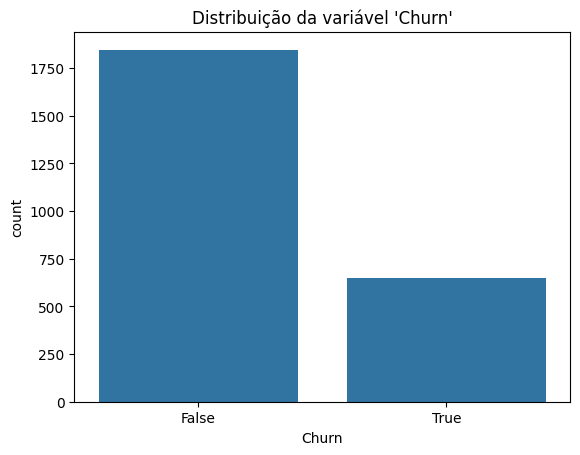

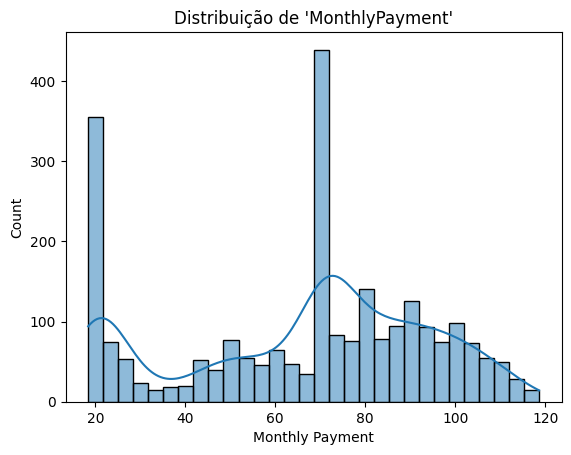

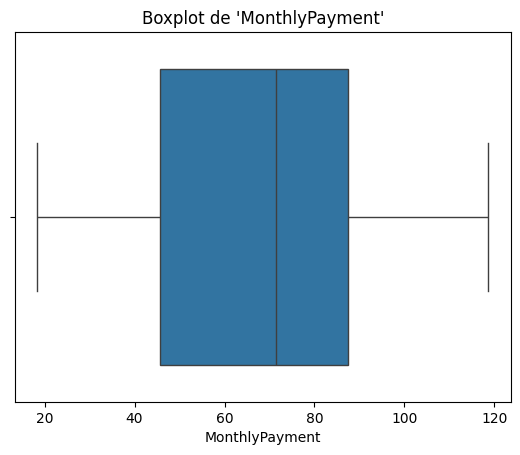

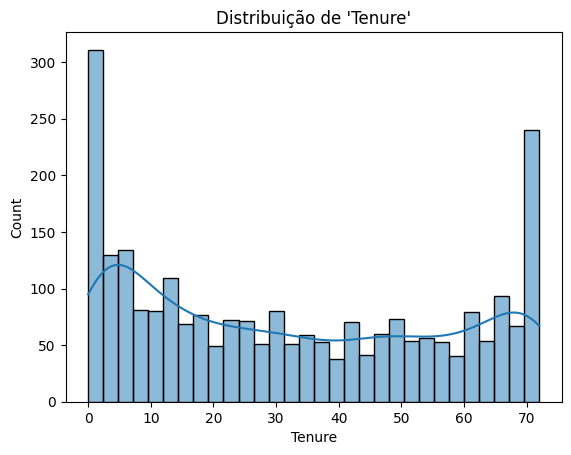

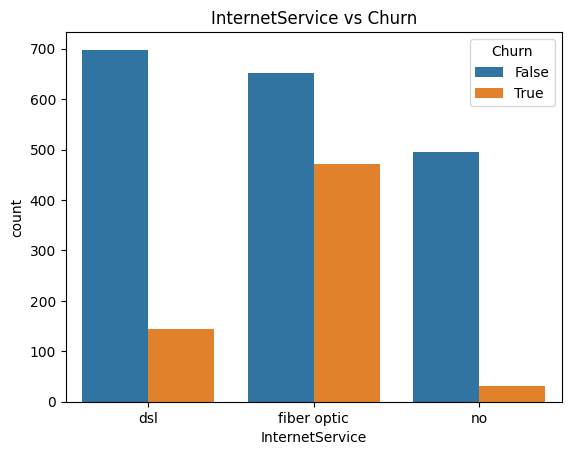

In [22]:
# 1. Distribuição da variável Churn
sns.countplot(data=df, x='Churn')
plt.title("Distribuição da variável 'Churn'")
plt.show()

# 2. Histograma de MonthlyPayment
sns.histplot(df['MonthlyPayment'], bins=30, kde=True)
plt.title("Distribuição de 'MonthlyPayment'")
plt.xlabel("Monthly Payment")
plt.show()

# 3. Boxplot de MonthlyPayment para observar outliers
sns.boxplot(data=df, x='MonthlyPayment')
plt.title("Boxplot de 'MonthlyPayment'")
plt.show()

# 4. Histograma de Tenure
sns.histplot(df['Tenure'], bins=30, kde=True)
plt.title("Distribuição de 'Tenure'")
plt.xlabel("Tenure")
plt.show()

# 5. Serviço de Internet vs Churn
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("InternetService vs Churn")
plt.show()

### 2C. Gráficos Univariados e Insights

#### Análise e Insights dos Gráficos

**Distribuição de Churn**:  
- **Observação**: A quantidade de False (não cancelou) é significativamente maior do que True (cancelou). Isso nos indica um desequilíbrio nos dados, com muito mais clientes retidos do que cancelados.  
- **Interpretação**: Esse desequilíbrio pode ser um ponto a ser considerado na modelagem, pois o modelo pode ter um viés em favor de prever False (retenção) se não for ajustado.

**Distribuição de MonthlyPayment com Churn**:  
- **Observação**: A distribuição de MonthlyPayment não é simétrica e apresenta uma concentração no início, indicando que muitos clientes pagam valores menores. Há uma queda acentuada, um pequeno pico próximo a 70 e, em seguida, um novo decréscimo.  
- **Interpretação**: Esse comportamento sugere que a maioria dos clientes está nas faixas iniciais de pagamento, e possivelmente, há menos clientes nas faixas mais altas. O pico próximo a 70 pode indicar uma faixa de valor mensal onde o churn é mais frequente, o que vale observar na modelagem.

**Boxplot de TotalPaid por Churn**:  
- **Observação**: Embora não haja outliers, a mediana de TotalPaid para os clientes que cancelaram está ligeiramente deslocada para a direita, indicando que eles tendem a ter um total pago um pouco maior que os que permaneceram.  
- **Interpretação**: Isso pode sugerir que clientes que gastaram mais ao longo do tempo podem ter uma probabilidade um pouco maior de cancelar. Esse tipo de informação pode ser relevante, pois o valor total pago poderia indicar maior insatisfação conforme o valor se acumula.

**Distribuição de Tenure com Churn**:  
- **Observação**: A maioria dos valores de Tenure está concentrada no começo, o que indica que a maior parte dos clientes possui menor tempo de permanência. No entanto, há um salto próximo ao valor de 70, seguido por outra queda.  
- **Interpretação**: Esse padrão pode indicar períodos críticos de churn, especialmente no início e após longos períodos, onde os clientes podem repensar o serviço.

**Contagem por Tipo de Contrato (ContractType) e Churn**:  
- **Observação**: O tipo de contrato DSL apresenta churn False muito alto, enquanto Fiber Optic também tem mais churn False, mas o churn True não fica tão abaixo quanto nas outras categorias.  
- **Interpretação**: Isso pode indicar que clientes de Fiber Optic têm maior probabilidade de cancelar em comparação com os clientes DSL. Essa observação pode ser relevante para entender melhor os serviços que mantêm os clientes e os que possuem maior risco de churn.


In [23]:
# Verificar balanceamento das variáveis booleanas
for column in df.select_dtypes(include='bool').columns:
    print(f"{column}:\n{df[column].value_counts(normalize=True)}\n")

IsElderly:
IsElderly
False    0.838878
True     0.161122
Name: proportion, dtype: float64

IsMarried:
IsMarried
False    0.507415
True     0.492585
Name: proportion, dtype: float64

HasDependents:
HasDependents
False    0.685371
True     0.314629
Name: proportion, dtype: float64

PhoneService:
PhoneService
True     0.965531
False    0.034469
Name: proportion, dtype: float64

SecurityService:
SecurityService
False    0.715431
True     0.284569
Name: proportion, dtype: float64

TechnicalSupport:
TechnicalSupport
False    0.714228
True     0.285772
Name: proportion, dtype: float64

StreamingTV:
StreamingTV
False    0.613627
True     0.386373
Name: proportion, dtype: float64

Churn:
Churn
False    0.73988
True     0.26012
Name: proportion, dtype: float64



### 2. Verificação de Balanceamento nas Variáveis Booleanas

**IsElderly**:  
- **Distribuição**: A maioria dos clientes (83,9%) não é idosa, enquanto apenas 16,1% são idosos.  
- **Interpretação**: Como os clientes idosos representam uma menor parcela, talvez haja uma menor incidência de churn nessa faixa etária. Isso poderia ser explorado para entender se a idade está associada à retenção.

**IsMarried**:  
- **Distribuição**: Os valores estão praticamente equilibrados, com 50,7% dos clientes não casados e 49,3% casados.  
- **Interpretação**: O fato de ser casado ou não é equilibrado, sugerindo que o estado civil não tem grande viés entre os clientes. É interessante verificar se isso se correlaciona de alguma forma com o churn.

**HasDependents**:  
- **Distribuição**: A maioria dos clientes (68,5%) não tem dependentes, enquanto 31,5% têm.  
- **Interpretação**: A diferença aqui sugere que clientes sem dependentes são mais comuns. Analisar essa variável com o churn pode revelar se ter dependentes tem algum impacto na retenção.

**PhoneService**:  
- **Distribuição**: A maioria esmagadora dos clientes (96,6%) possui serviço de telefone.  
- **Interpretação**: O serviço de telefone é quase universal entre os clientes. Pode ser útil investigar se os poucos clientes sem esse serviço têm uma probabilidade maior de churn ou algum padrão específico.

**SecurityService**:  
- **Distribuição**: A maioria dos clientes (71,5%) não possui serviço de segurança.  
- **Interpretação**: Como a adesão a este serviço é menor, pode valer a pena analisar se o serviço de segurança influencia o churn e se há uma oportunidade de incentivar sua contratação para melhorar a retenção.

**TechnicalSupport**:  
- **Distribuição**: Semelhante ao SecurityService, 71,4% dos clientes não possuem suporte técnico.  
- **Interpretação**: Isso também pode ser uma área de exploração para verificar se a ausência de suporte técnico está relacionada a uma maior propensão ao churn.

**StreamingTV**:  
- **Distribuição**: 61,4% dos clientes não possuem serviço de TV por streaming, enquanto 38,6% possuem.  
- **Interpretação**: A adesão ao serviço de TV por streaming é considerável, e investigar sua relação com o churn pode ajudar a identificar se clientes com entretenimento adicional tendem a ficar mais tempo.

**Churn**:  
- **Distribuição**: A taxa de churn é de 26%, com 74% dos clientes mantendo o serviço.  
- **Interpretação**: O churn está moderadamente presente, mas o valor não é alto. Esse percentual será o foco na modelagem preditiva, considerando tanto os clientes que cancelaram quanto os que permaneceram.


# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [24]:
# Função para identificar outliers com base no IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Função para identificar outliers com base no Z-score
def identify_outliers_zscore(df, column):
    df[f"{column}_zscore"] = zscore(df[column])
    outliers = df[abs(df[f"{column}_zscore"]) > 3]
    return outliers

# Identificar e tratar outliers para cada variável numérica
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    print(f"--- Outliers em {column} ---")

    # IQR
    outliers_iqr = identify_outliers_iqr(df, column)
    print(f"Outliers pelo IQR: {len(outliers_iqr)}")

    # Z-score
    outliers_zscore = identify_outliers_zscore(df, column)
    print(f"Outliers pelo Z-score: {len(outliers_zscore)}")

    # Decisão de tratamento
    if len(outliers_iqr) > 0 or len(outliers_zscore) > 0:
        print(f"Decisão: Não removerei os outliers de {column} por enquanto, pois podem conter informações valiosas sobre clientes atípicos.\n")
    else:
        print(f"Decisão: Nenhum outlier identificado em {column}.\n")


--- Outliers em Tenure ---
Outliers pelo IQR: 0
Outliers pelo Z-score: 0
Decisão: Nenhum outlier identificado em Tenure.

--- Outliers em MonthlyPayment ---
Outliers pelo IQR: 0
Outliers pelo Z-score: 0
Decisão: Nenhum outlier identificado em MonthlyPayment.

--- Outliers em TotalPaid ---
Outliers pelo IQR: 0
Outliers pelo Z-score: 0
Decisão: Nenhum outlier identificado em TotalPaid.

--- Outliers em Tenure_zscore ---
Outliers pelo IQR: 0
Outliers pelo Z-score: 0
Decisão: Nenhum outlier identificado em Tenure_zscore.

--- Outliers em MonthlyPayment_zscore ---
Outliers pelo IQR: 0
Outliers pelo Z-score: 0
Decisão: Nenhum outlier identificado em MonthlyPayment_zscore.

--- Outliers em TotalPaid_zscore ---
Outliers pelo IQR: 0
Outliers pelo Z-score: 0
Decisão: Nenhum outlier identificado em TotalPaid_zscore.



### **Análise de Outliers**

Após rodar os métodos de **IQR** e **Z-score**, **nenhum outlier** foi identificado nas variáveis analisadas, nem nas colunas derivadas de Z-scores.

**O que eu percebi:**

- **Tenure**:  
  Nenhum valor saiu dos limites esperados. A distribuição parece bem normal, sem extremos que precisassem de atenção especial.

- **MonthlyPayment e TotalPaid**:  
  Inicialmente, eu pensei que valores altos nessas variáveis pudessem ser classificados como outliers, mas os métodos mostraram que tudo está dentro da faixa considerada aceitável. Portanto, esses valores não são problemáticos.

- **Colunas derivadas de Z-score**:  
  Aqui também tudo ficou tranquilo, sem nenhum comportamento estranho aparecendo nos cálculos adicionais.

**Decisão**:  
Não foi necessário realizar nenhum ajuste, pois não houve outliers para tratar. Prefiro manter tudo como está, para garantir que o conjunto de dados reflita a realidade e evitar a remoção de dados que poderiam ser importantes.


# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

### **O que é Churn?**  

O **Churn** é um termo usado para descrever a **taxa de cancelamento de clientes** ou a **perda de clientes** em um determinado período.  

No contexto de telecomunicações (como nesta análise), o Churn refere-se a clientes que **cancelaram seus planos ou serviços**, sendo representado como uma variável booleana:  
- **True (ou 1)**: O cliente cancelou (churnou).  
- **False (ou 0)**: O cliente permaneceu ativo.  

A análise do Churn é crucial para compreender os motivos por trás do cancelamento e **desenvolver estratégias eficazes para reduzir essa perda**.


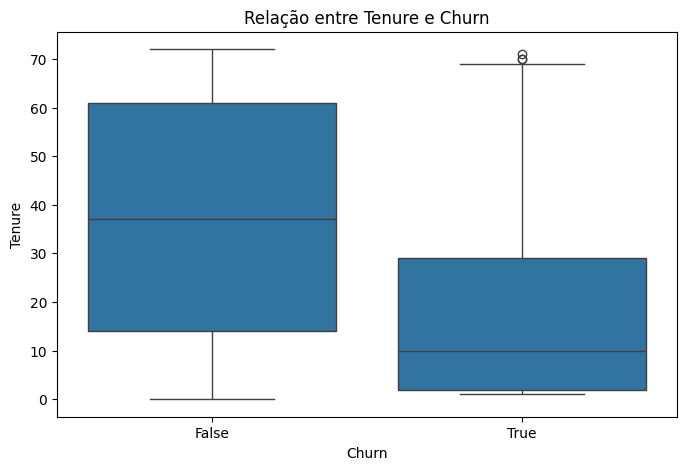

Clientes que churnaram possuem um tempo médio de permanência de 17.98 meses, enquanto os que não churnaram possuem 37.41 meses.


In [25]:
# Gráfico de Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title("Relação entre Tenure e Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

# Análise textual
mean_tenure_churn = df[df['Churn'] == True]['Tenure'].mean()
mean_tenure_no_churn = df[df['Churn'] == False]['Tenure'].mean()
print(f"Clientes que churnaram possuem um tempo médio de permanência de {mean_tenure_churn:.2f} meses, enquanto os que não churnaram possuem {mean_tenure_no_churn:.2f} meses.")

#### **1. Tempo Médio de Permanência (Tenure)**  
- **Clientes que churnaram**: Tempo médio de permanência de **17.98 meses**.  
- **Clientes que não churnaram**: Tempo médio de permanência de **37.41 meses**.  
- Isso indica que clientes com menor fidelidade ao serviço estão mais propensos a cancelar.


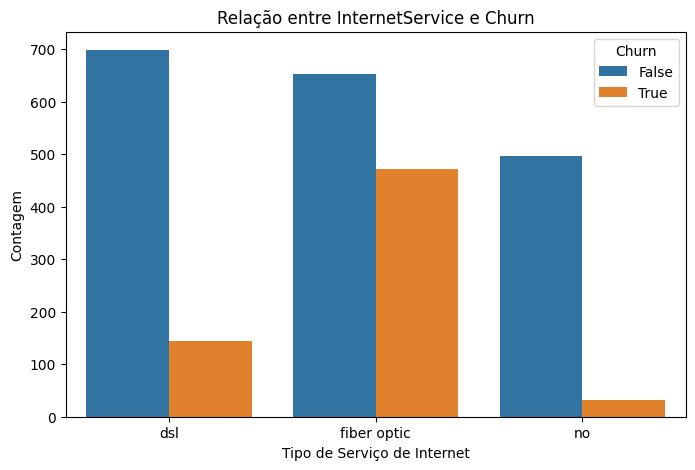

Proporção de Churn por tipo de serviço de internet:
Churn               False     True 
InternetService                    
dsl              0.827995  0.172005
fiber optic      0.580071  0.419929
no               0.939394  0.060606


In [26]:
# Gráfico de InternetService vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Relação entre InternetService e Churn")
plt.xlabel("Tipo de Serviço de Internet")
plt.ylabel("Contagem")
plt.show()

# Análise textual
internet_service_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
print("Proporção de Churn por tipo de serviço de internet:")
print(internet_service_churn)

#### **2. Tipo de Serviço de Internet**  
- **DSL**: Taxa de Churn mais baixa (**17.20%**).  
- **Fiber optic**: Taxa de Churn mais alta (**41.99%**).  
- **Sem serviço de internet**: Quase nenhum Churn (**6.06%**).  
- Clientes de fibra óptica têm maior probabilidade de cancelar, possivelmente devido a custos ou insatisfação com o serviço.


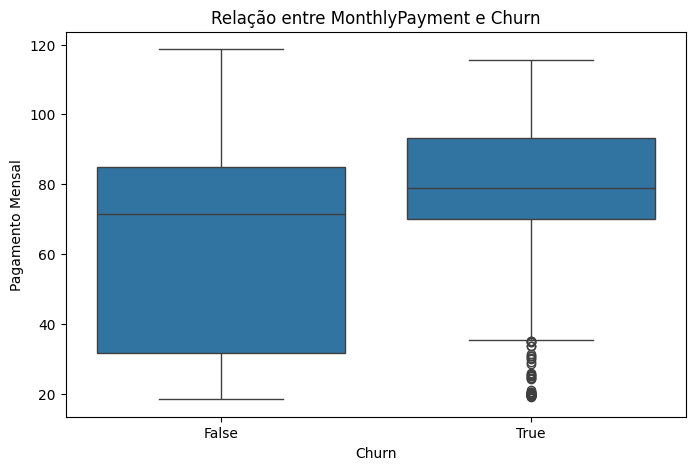

Clientes que churnaram possuem um pagamento mensal médio de R$ 75.94, enquanto os que não churnaram possuem R$ 62.99.


In [27]:
# Gráfico de MonthlyPayment vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyPayment')
plt.title("Relação entre MonthlyPayment e Churn")
plt.xlabel("Churn")
plt.ylabel("Pagamento Mensal")
plt.show()

# Análise textual
mean_payment_churn = df[df['Churn'] == True]['MonthlyPayment'].mean()
mean_payment_no_churn = df[df['Churn'] == False]['MonthlyPayment'].mean()
print(f"Clientes que churnaram possuem um pagamento mensal médio de R$ {mean_payment_churn:.2f}, enquanto os que não churnaram possuem R$ {mean_payment_no_churn:.2f}.")

#### **3. MonthlyPayment**  
- **Clientes que churnaram**: Pagam, em média, mais (**R$ 75.94**) do que os que não churnaram (**R$ 62.99**).  
- Planos mais caros mostram uma relação com maiores taxas de cancelamento.


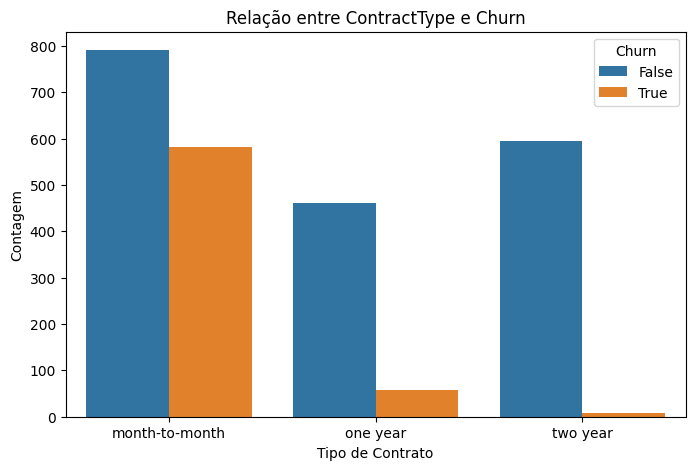

Proporção de Churn por tipo de contrato:
Churn              False     True 
ContractType                      
month-to-month  0.576111  0.423889
one year        0.888031  0.111969
two year        0.985099  0.014901


In [28]:
# Gráfico de ContractType vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ContractType', hue='Churn')
plt.title("Relação entre ContractType e Churn")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Contagem")
plt.show()

# Análise textual
contract_type_churn = df.groupby('ContractType')['Churn'].value_counts(normalize=True).unstack()
print("Proporção de Churn por tipo de contrato:")
print(contract_type_churn)


#### **4. ContractType**  
- **Mensal (month-to-month)**: Apresenta a taxa de Churn mais alta (**42.38%**).  
- **Contratos anuais e bienais**: Possuem taxas de Churn muito baixas (**11.20%** e **1.49%**, respectivamente).  
- Contratos mais longos incentivam a permanência dos clientes, promovendo maior estabilidade.


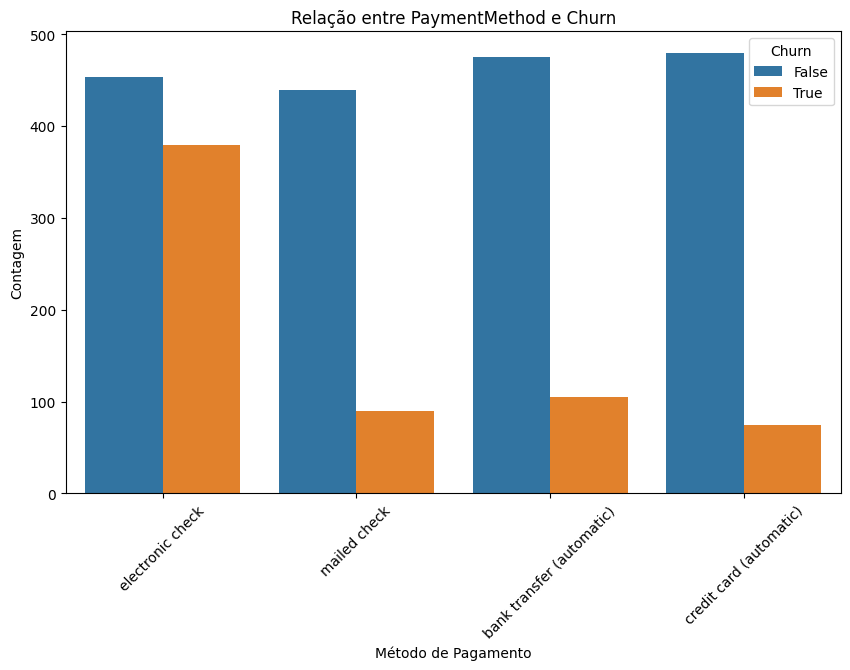

Proporção de Churn por método de pagamento:
Churn                         False     True 
PaymentMethod                                
bank transfer (automatic)  0.818966  0.181034
credit card (automatic)    0.864621  0.135379
electronic check           0.544471  0.455529
mailed check               0.829868  0.170132


In [29]:
# Gráfico de PaymentMethod vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Relação entre PaymentMethod e Churn")
plt.xlabel("Método de Pagamento")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.show()

# Análise textual
payment_method_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
print("Proporção de Churn por método de pagamento:")
print(payment_method_churn)


#### **5. PaymentMethod**  
- **Electronic check**: Apresenta a maior taxa de Churn (**45.55%**).  
- **Bank transfer, credit card, mailed check**: Possuem taxas de Churn mais baixas, com destaque para **cartão de crédito automático** (**13.54%**).  
- Métodos automáticos parecem estar associados a maior retenção de clientes, enquanto pagamentos manuais geram mais cancelamentos.


### 4B) Variáveis mais importantes relacionadas ao Churn:

Com base nas análises realizadas, as principais variáveis relacionadas ao Churn, considerando impacto significativo e associação direta, são:

#### **1. ContractType**  
- Clientes com contratos mensais possuem uma taxa de Churn expressiva (**42.38%**), enquanto contratos anuais e bienais apresentam taxas bem menores (**11.19%** e **1.49%**, respectivamente).  
- Contratos mais curtos indicam maior probabilidade de cancelamento, tornando o tipo de contrato uma variável-chave.  

#### **2. InternetService**  
- Clientes com fibra óptica apresentam a maior taxa de Churn (**41.99%**), em contraste com DSL (**17.20%**) e sem internet (**6.06%**).  
- Essa variável reflete insatisfação ou desafios específicos do tipo de serviço oferecido.  

#### **3. PaymentMethod**  
- O método **electronic check** apresenta a maior taxa de Churn (**45.55%**), destacando sua importância para entender e mitigar cancelamentos.  
- Métodos automáticos (transferência bancária ou cartão de crédito) têm menores taxas de Churn.  

Essas variáveis foram selecionadas por apresentarem padrões claros e diferenças marcantes entre clientes que churnaram e os que não churnaram, sendo cruciais para estratégias preditivas e de retenção.
